In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [7]:
# Load Walmart sales data
df = pd.read_csv("D://data science//projects//Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df.info()  # Check column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
df.isnull().sum()  # Check for missing data

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
# Convert Date column to DateTime format
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)

In [21]:
df.info() # Check Date column type are converted into datetime format or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [87]:
# 1. Which stores have maximum and sales?

# Grouping data by Store and summing up sales
store_sales = df.groupby("Store")["Weekly_Sales"].sum().reset_index()

# Finding the store with the maximum sales
max_sales_store = store_sales.loc[store_sales["Weekly_Sales"].idxmax()]

print(f"Store with Maximum Sales: {max_sales_store['Store']} with ${max_sales_store['Weekly_Sales']:.2f}")

Store with Maximum Sales: 20.0 with $301397792.46


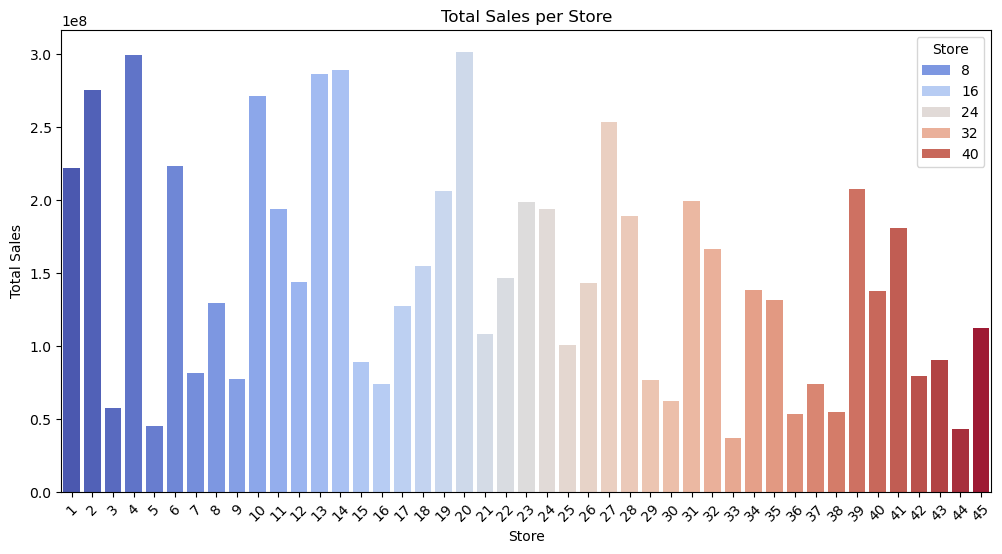

In [135]:
# Plot Sales Across Stores
plt.figure(figsize=(12, 6))
sns.barplot(x="Store", y="Weekly_Sales", data=store_sales, hue='Store', palette="coolwarm")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.title("Total Sales per Store")
plt.xticks(rotation=45)
plt.show()

In [111]:

#store_std = df.groupby("Store")["Weekly_Sales"].std().reset_index()

# Find the store with maximum standard deviation
#max_std_store = store_std.loc[store_std["Weekly_Sales"].idxmax()]
#max_std_store

Store           44
Weekly_Sales    13
dtype: int64

In [115]:
# 2. Which store has maximum standard deviation i.e., the sales vary a lot?. Also, find out the coefficient of mean to standard deviation.

# Calculate standard deviation for each store
store_std = df.groupby("Store")["Weekly_Sales"].std().reset_index()

# Find the store with maximum standard deviation
max_std_store = store_std.loc[store_std["Weekly_Sales"].idxmax()]

print(f"Store with Maximum Sales Variability: {max_std_store['Store']} with Std Dev: {max_std_store['Weekly_Sales']:.2f}")

# Calculate the coefficient of variation (std/mean)
store_mean = df.groupby("Store")["Weekly_Sales"].mean().reset_index()

store_std["Coefficient of Variation"] = store_std["Weekly_Sales"] / store_mean["Weekly_Sales"]
store_std

Store with Maximum Sales Variability: 14.0 with Std Dev: 317569.95


,Store,Weekly_Sales,Coefficient of Variation
0,1,155980.767761,0.100292
1,2,237683.694682,0.123424
2,3,46319.631557,0.115021
3,4,266201.442297,0.127083
4,5,37737.965745,0.118668
5,6,212525.855862,0.135823
6,7,112585.469220,0.197305
7,8,106280.829881,0.116953
8,9,69028.666585,0.126895
9,10,302262.062504,0.159133


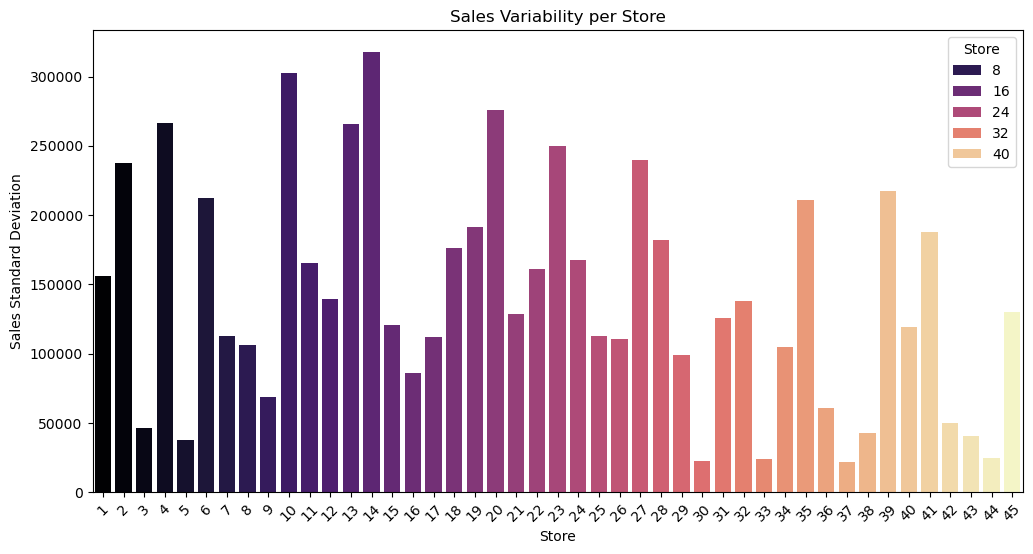

In [139]:
# Plot Standard Deviation of Sales
plt.figure(figsize=(12, 6))
sns.barplot(x="Store", y="Weekly_Sales", data=store_std, palette="magma", hue='Store')
plt.xlabel("Store")
plt.ylabel("Sales Standard Deviation")
plt.title("Sales Variability per Store")
plt.xticks(rotation=45)
plt.show()

In [121]:
# 3. Which store/s has good quarterly growth rate in Q3’2012?

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract Year and Quarter
df["Year"] = df["Date"].dt.year
df["Quarter"] = df["Date"].dt.quarter

# Filter data for Q3 2012
q3_2012 = df[(df["Year"] == 2012) & (df["Quarter"] == 3)]

# Calculate quarterly growth rate per store
q3_growth = q3_2012.groupby("Store")["Weekly_Sales"].sum().pct_change().dropna()

# Find the store with highest growth
best_growth_store = q3_growth.idxmax()

print(f"Store with Highest Growth in Q3 2012: Store {best_growth_store} with Growth Rate: {q3_growth[best_growth_store]:.2%}")

Store with Highest Growth in Q3 2012: Store 4 with Growth Rate: 424.67%


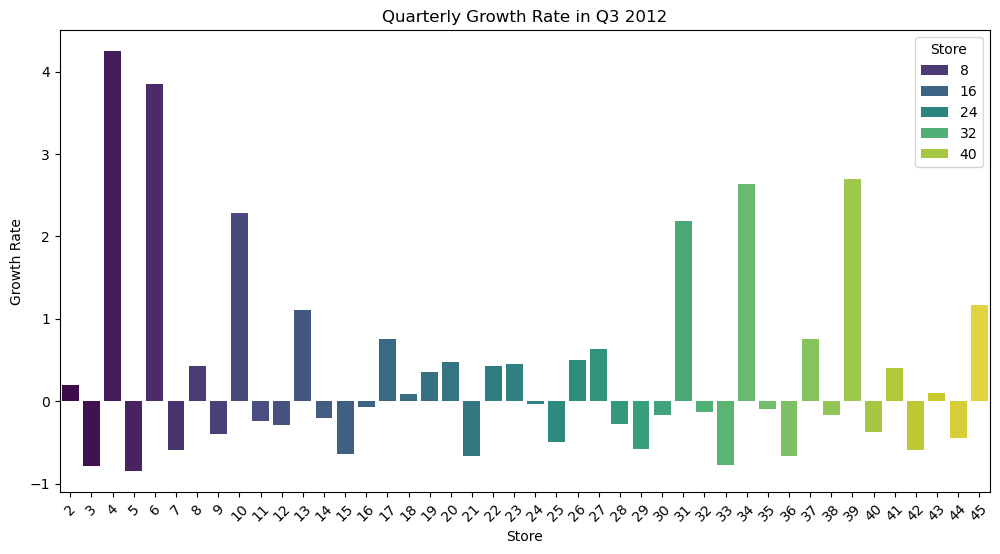

In [155]:
# Plot Quarterly Growth Rate
plt.figure(figsize=(12, 6))
sns.barplot(x=q3_growth.index, y=q3_growth.values, palette="viridis", hue=q3_growth.index)
plt.xlabel("Store")
plt.ylabel("Growth Rate")
plt.title("Quarterly Growth Rate in Q3 2012")
plt.xticks(rotation=45)
plt.show()

In [157]:
# 4) Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

# Identify holidays
df["Is_Holiday"] = df["Holiday_Flag"] == 1

# Calculate mean sales in non-holiday season
mean_non_holiday_sales = df[~df["Is_Holiday"]]["Weekly_Sales"].mean()

# Find holidays with sales higher than mean non-holiday sales
holiday_sales = df[df["Is_Holiday"]].groupby("Date")["Weekly_Sales"].sum()
higher_holiday_sales = holiday_sales[holiday_sales > mean_non_holiday_sales]

print("Holidays with Higher Sales than Mean Non-Holiday Sales:")
print(higher_holiday_sales)

Holidays with Higher Sales than Mean Non-Holiday Sales:
Date
2010-02-12    48336677.63
2010-09-10    45634397.84
2010-11-26    65821003.24
2010-12-31    40432519.00
2011-02-11    47336192.79
2011-09-09    46763227.53
2011-11-25    66593605.26
2011-12-30    46042461.04
2012-02-10    50009407.92
2012-09-07    48330059.31
Name: Weekly_Sales, dtype: float64


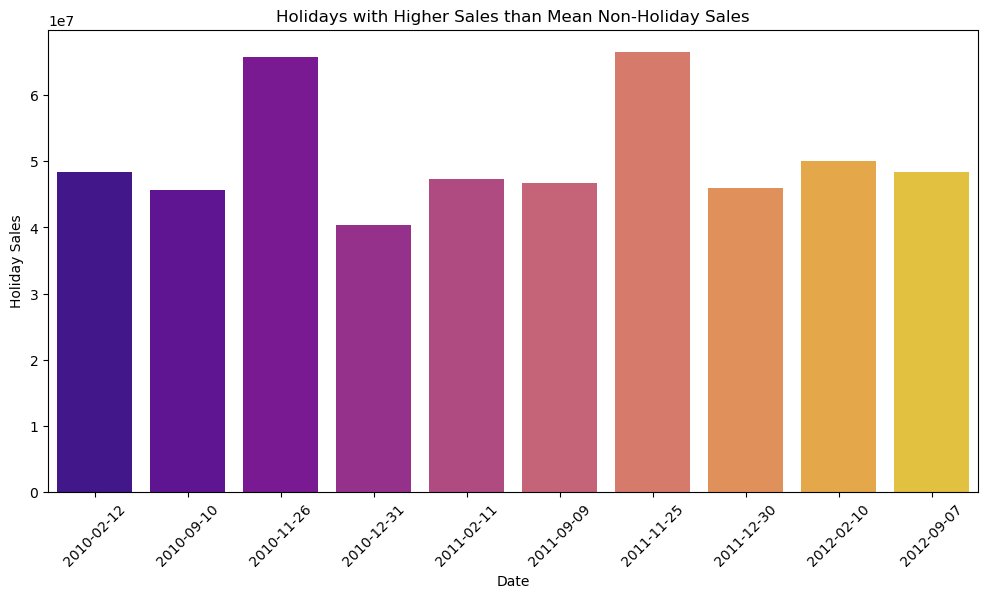

In [161]:
# Plot Holiday Sales
plt.figure(figsize=(12, 6))
sns.barplot(x=higher_holiday_sales.index.astype(str), y=higher_holiday_sales.values, palette="plasma", hue=higher_holiday_sales.index.astype(str))
plt.xlabel("Date")
plt.ylabel("Holiday Sales")
plt.title("Holidays with Higher Sales than Mean Non-Holiday Sales")
plt.xticks(rotation=45)
plt.show()

In [181]:
# 5) Provide a monthly and semester view of sales in units and give insights.

# Extract Month and Semester
df["Month"] = df["Date"].dt.month
df["Semester"] = np.where(df["Month"] <= 6, "H1", "H2")

# Aggregate Monthly Sales
monthly_sales = df.groupby("Month")["Weekly_Sales"].sum().reset_index()
print(monthly_sales)

# Aggregate Semester Sales
semester_sales = df.groupby("Semester")["Weekly_Sales"].sum().reset_index()
print(semester_sales)

    Month  Weekly_Sales
0       1  3.325984e+08
1       2  5.687279e+08
2       3  5.927859e+08
3       4  6.468598e+08
4       5  5.571256e+08
5       6  6.226299e+08
6       7  6.500010e+08
7       8  6.130902e+08
8       9  5.787612e+08
9      10  5.847848e+08
10     11  4.130157e+08
11     12  5.768386e+08
  Semester  Weekly_Sales
0       H1  3.320727e+09
1       H2  3.416492e+09


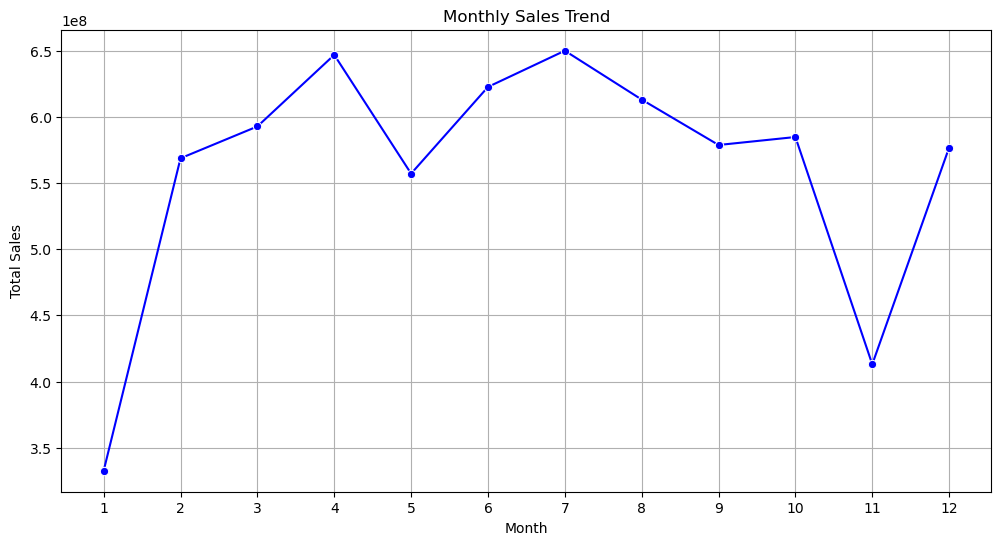

In [169]:
# Plot Monthly Sales
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="b")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(range(1, 13))
plt.grid()
plt.show()

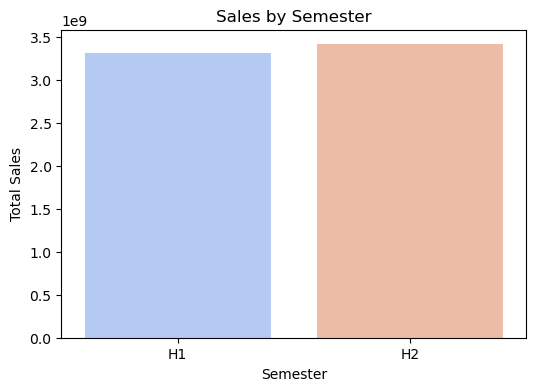

In [177]:
# Plot Semester Sales
plt.figure(figsize=(6, 4))
sns.barplot(x=semester_sales.index, y=semester_sales.values, palette="coolwarm", hue=semester_sales.index)
plt.xlabel("Semester")
plt.ylabel("Total Sales")
plt.title("Sales by Semester")
plt.show()